In [47]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import h5py
import os
import seaborn as sns
import shutil



In [52]:
def plot_delta_ovlp(filename="abvmc.hdf5", discard = 2, annot=True):
    copyfile = "copy_" + filename
    shutil.copyfile(filename, copyfile)
    f = h5py.File(copyfile, "r")    
    keys = f.keys()
    
    fig, ax = plt.subplots(3, 2, figsize = (12, 15))    
    ovlp_ij_raw=np.array(f['excitationsovlp_ij'])
    delta_ij_raw=np.array(f['excitationsdelta'])
    discard = 2
    ovlp_ij = np.average(ovlp_ij_raw[discard:], axis=0)
    # plt.figure()
    sns.heatmap(ovlp_ij, ax=ax[0, 0], annot=annot)
    ax[0, 0].set_title('Overlap matrix')
    # plt.title('Overlap matrix')

    ovlp_ij_std = np.std(ovlp_ij_raw[discard:], axis=0)
    sns.heatmap(ovlp_ij_std, ax=ax[1, 0], annot=annot)
    ax[1, 0].set_title('Standard deviation of overlap matrix')
    
    filtered_ovlp_ij = copy.deepcopy(ovlp_ij)
    filtered_ovlp_ij[ovlp_ij_std>np.abs(ovlp_ij)] = 0
    sns.heatmap(filtered_ovlp_ij, ax=ax[2, 0], annot=annot)
    ax[2, 0].set_title('Filtered overlap matrix')
    


    delta_ij = np.average(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij, ax=ax[0, 1], annot=annot)
    ax[0, 1].set_title('Delta matrix')
                       
    delta_ij_std = np.std(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij_std, ax=ax[1, 1], annot=annot)
    ax[1, 1].set_title('Standard deviation of delta matrix')
    

    filtered_delta_ij = copy.deepcopy(delta_ij)
    filtered_delta_ij[delta_ij_std>np.abs(delta_ij)] = 0
    sns.heatmap(filtered_delta_ij, ax=ax[2, 1], annot=annot)
    ax[2, 1].set_title('Filtered Delta matrix')

    os.remove(copyfile)
    return {'filtered': [filtered_ovlp_ij, filtered_delta_ij], 
            'raw': [ovlp_ij_raw, delta_ij_raw]}
# res = plot_delta_ovlp()

In [53]:
import pyqmc.api as pyq
abvmcopt_file = "h2_opt_cas_3_nelecas_1_1.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-1.045436,0,0.001429,h2_opt_cas_3_nelecas_1_1.hdf5
1,-1.051202,1,0.001679,h2_opt_cas_3_nelecas_1_1.hdf5
2,-1.062999,2,0.002184,h2_opt_cas_3_nelecas_1_1.hdf5
3,-1.066961,3,0.002591,h2_opt_cas_3_nelecas_1_1.hdf5
4,-1.072168,4,0.001849,h2_opt_cas_3_nelecas_1_1.hdf5
5,-1.063505,5,0.001911,h2_opt_cas_3_nelecas_1_1.hdf5
6,-1.066346,6,0.001483,h2_opt_cas_3_nelecas_1_1.hdf5
7,-1.069883,7,0.000995,h2_opt_cas_3_nelecas_1_1.hdf5
8,-1.067377,8,0.001049,h2_opt_cas_3_nelecas_1_1.hdf5
9,-1.070650,9,0.001687,h2_opt_cas_3_nelecas_1_1.hdf5


Text(0, 0.5, 'Energy (Ha)')

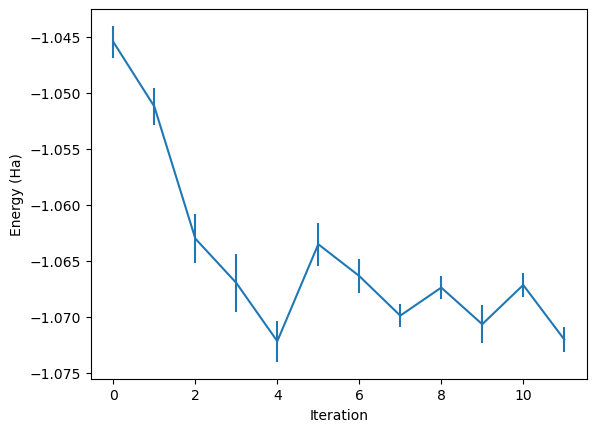

In [54]:
y = df['energy']
x = np.arange(len(y))
plt.errorbar(x, y, yerr = df['error'])
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

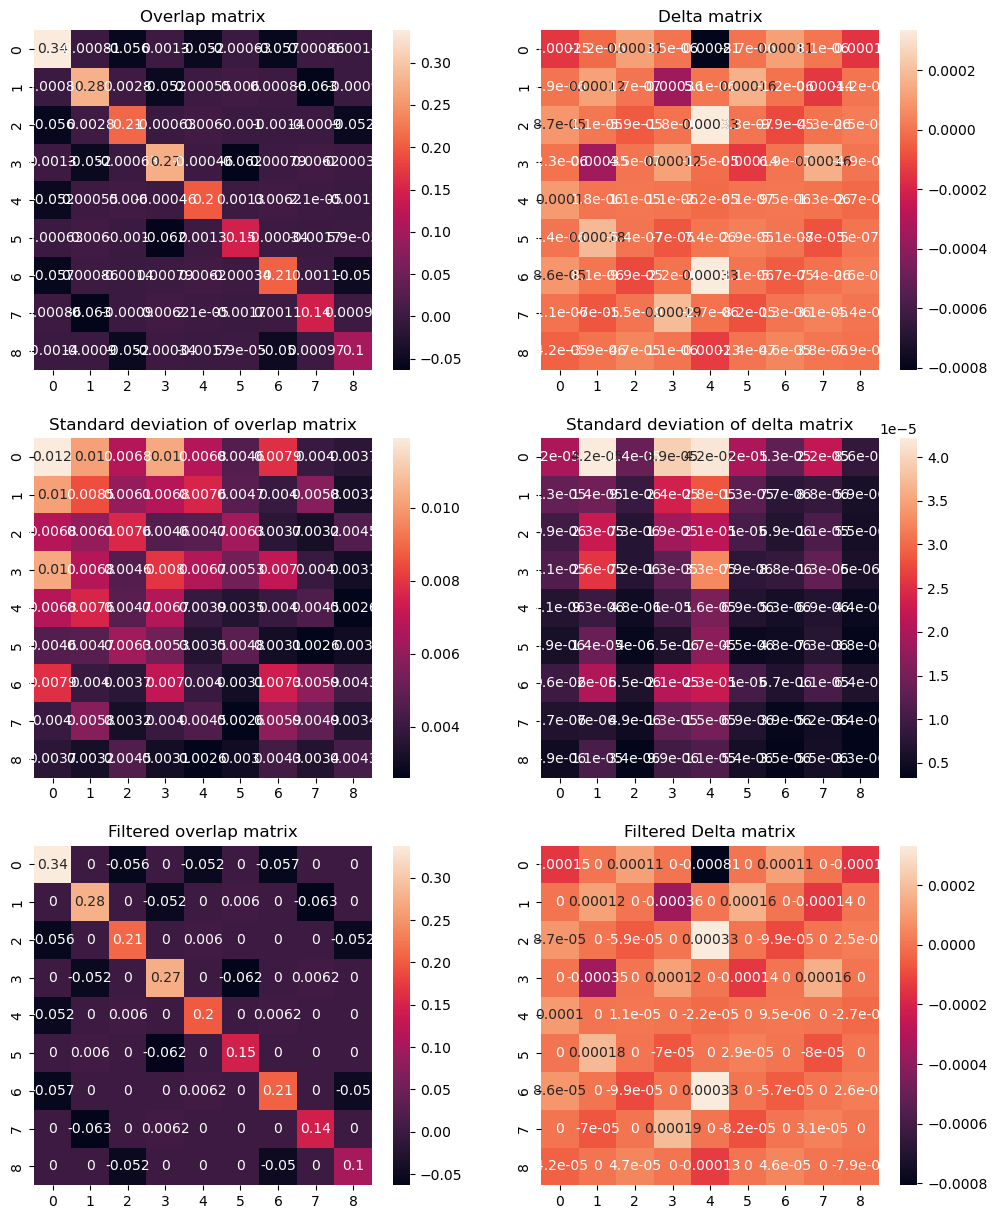

In [60]:
res = plot_delta_ovlp("h2_vmc_cas_3_nelecas_1_1.hdf5", discard=15, annot=True)

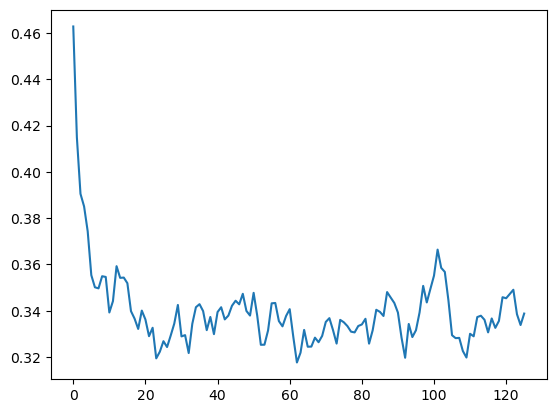

In [61]:
plt.plot(res['raw'][0][:, 0,0])

# Ion cusp = False

In [11]:
import pyqmc.api as pyq
abvmcopt_file = "h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-1.046258,0,0.003305,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
1,-1.053885,1,0.001618,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
2,-1.065669,2,0.001524,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
3,-1.064594,3,0.001181,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
4,-1.067821,4,0.002342,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
5,-1.068756,5,0.001810,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
6,-1.069133,6,0.002129,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
7,-1.067271,7,0.001455,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
8,-1.068944,8,0.001387,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5
9,-1.065246,9,0.002440,h2_opt_cas_3_nelecas_1_1-ion_cusp.hdf5


Text(0, 0.5, 'Energy (Ha)')

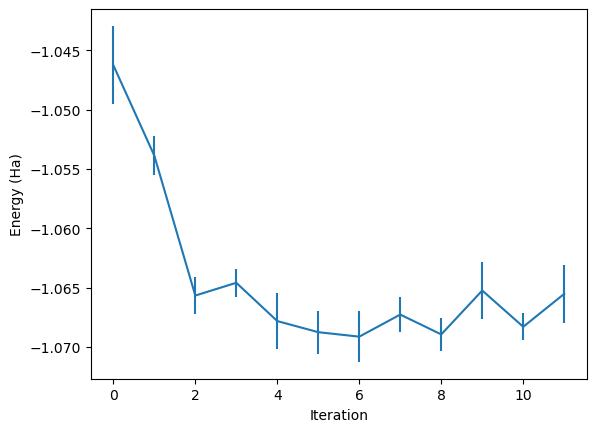

In [8]:
y = df['energy']
x = np.arange(len(y))
plt.errorbar(x, y, yerr = df['error'])
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

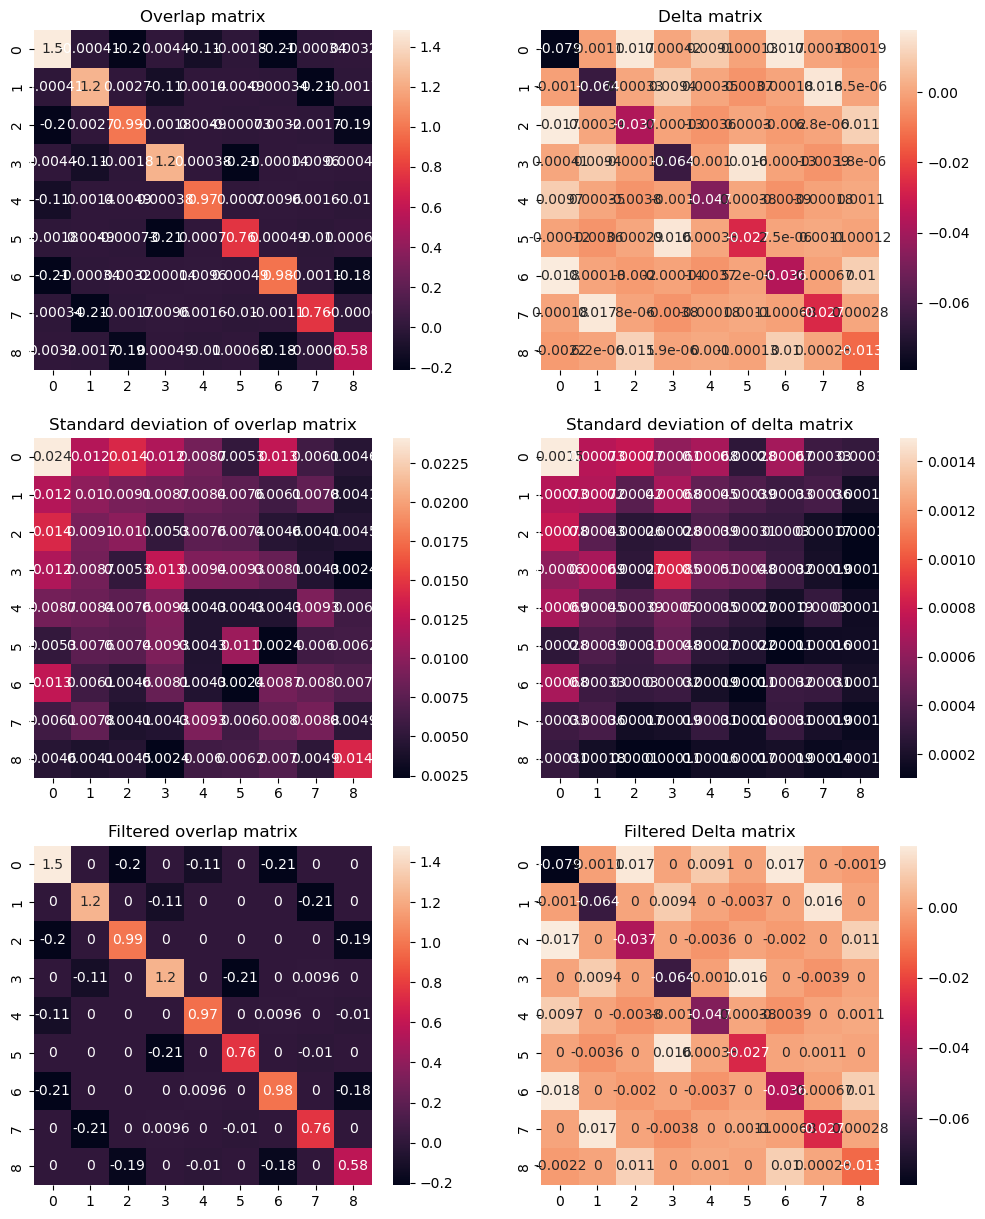

In [9]:
res = plot_delta_ovlp("h2_vmc_cas_3_nelecas_1_1-ion_cusp.hdf5", discard=10, annot=True)

# Ion cusp = False and na = 0

In [18]:
import pyqmc.api as pyq
abvmcopt_file = "h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-1.044138,0,0.002228,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
1,-1.045037,1,0.002433,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
2,-1.048456,2,0.002190,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
3,-1.055886,3,0.001907,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
4,-1.059712,4,0.002196,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
5,-1.054174,5,0.002163,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
6,-1.062796,6,0.001406,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
7,-1.062057,7,0.002146,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
8,-1.054815,8,0.001776,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5
9,-1.053740,9,0.001692,h2_opt_cas_3_nelecas_1_1-ion_cusp-na.hdf5


Text(0, 0.5, 'Energy (Ha)')

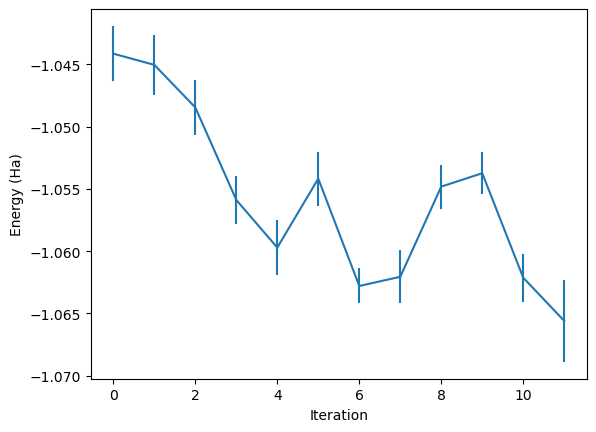

In [19]:
y = df['energy']
x = np.arange(len(y))
plt.errorbar(x, y, yerr = df['error'])
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

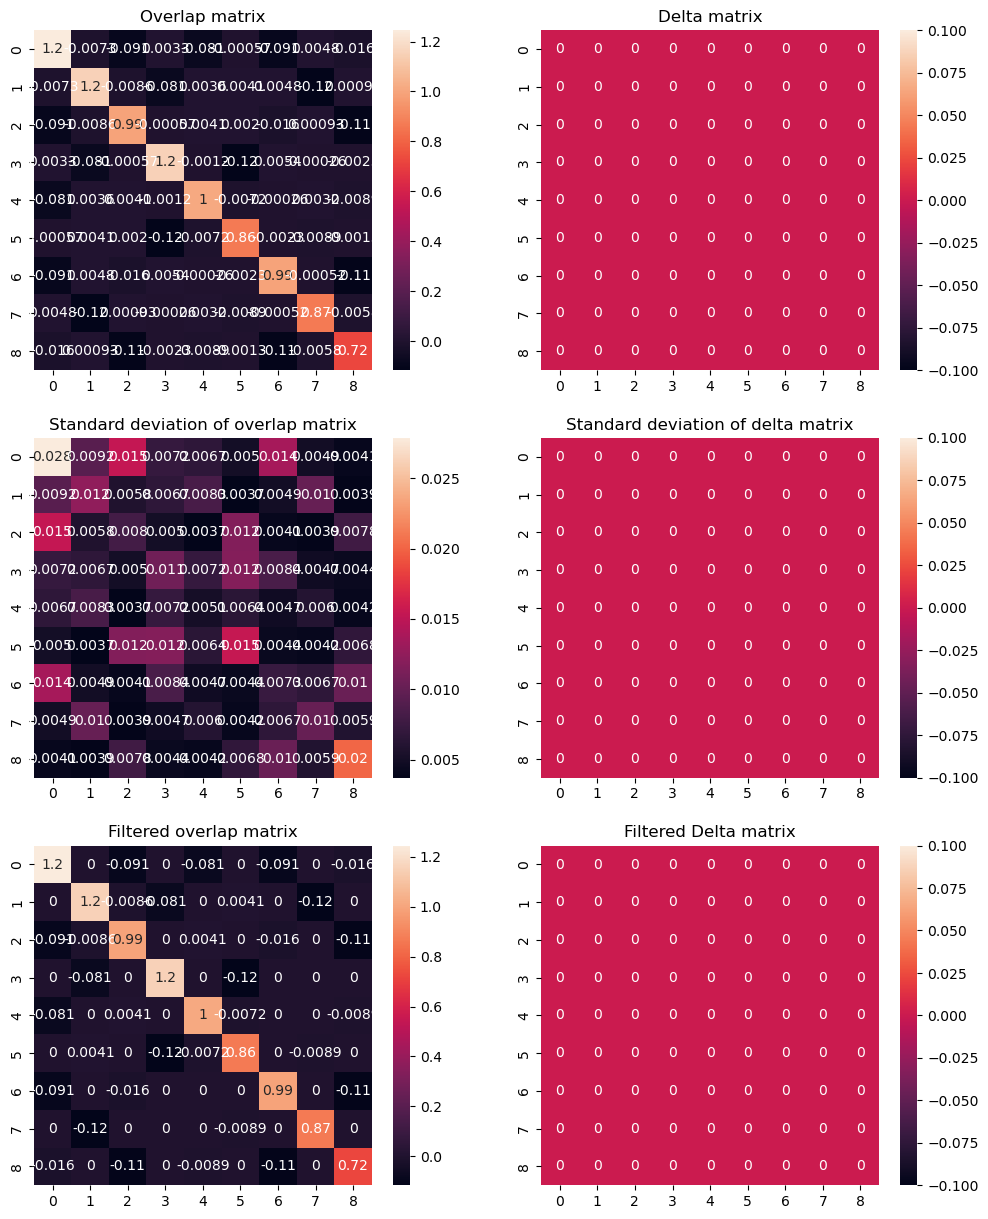

In [14]:
res = plot_delta_ovlp("h2_vmc_cas_3_nelecas_1_1-ion_cusp-na.hdf5", discard=10, annot=True)

In [16]:
# Jastrow as-is

In [21]:
import pyqmc.api as pyq
abvmcopt_file = "h2_opt_cas_3_nelecas_1_1.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-1.023694,0,0.009365,h2_opt_cas_3_nelecas_1_1.hdf5
1,-1.045011,1,0.006431,h2_opt_cas_3_nelecas_1_1.hdf5
2,-1.058393,2,0.006766,h2_opt_cas_3_nelecas_1_1.hdf5
3,-1.065537,3,0.004346,h2_opt_cas_3_nelecas_1_1.hdf5
4,-1.066175,4,0.002424,h2_opt_cas_3_nelecas_1_1.hdf5
5,-1.060423,5,0.005055,h2_opt_cas_3_nelecas_1_1.hdf5
6,-1.075570,6,0.001566,h2_opt_cas_3_nelecas_1_1.hdf5
7,-1.071611,7,0.002917,h2_opt_cas_3_nelecas_1_1.hdf5
8,-1.071519,8,0.003567,h2_opt_cas_3_nelecas_1_1.hdf5
9,-1.065888,9,0.003634,h2_opt_cas_3_nelecas_1_1.hdf5


Text(0, 0.5, 'Energy (Ha)')

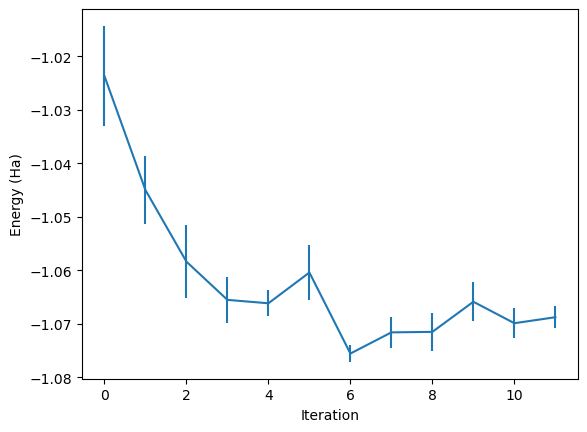

In [22]:
y = df['energy']
x = np.arange(len(y))
plt.errorbar(x, y, yerr = df['error'])
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

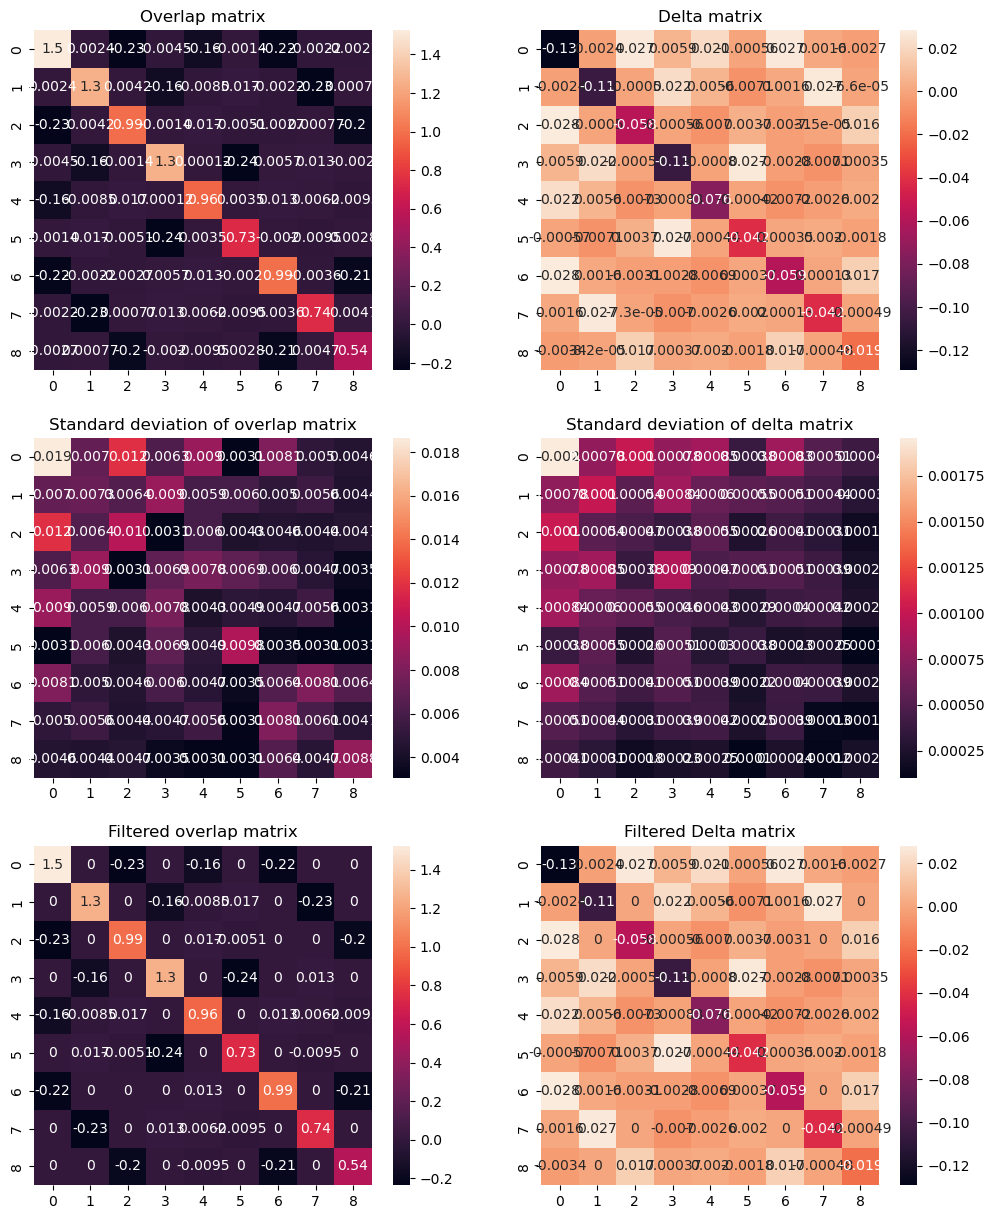

In [23]:
res = plot_delta_ovlp("h2_vmc_cas_3_nelecas_1_1.hdf5", discard=10, annot=True)